AIM 1: Perform Regression

1. Load the titanic dataset
2. Handle missing values, if any
3. Check for linearity between 'Age' and 'Fare'
    3.1. If it's linear, perform Regression and visualize it
    3.2. If it's not linear, still perform Regression and visualize it. What do you make of the result?
    3.3. Plot the residuals to see if it's normally distributed. Residual can be plotted as scatter plot between the predicted Y value and residuals is the actual Y values and the predicted values. Predicted values is (intercept + slope * X)
4. Load the penguins dataset
5. Handle missing values, if any
6. Check for linearity between 'bill_length_mm' and 'body_mass_g', and repeat the same process as you did in Step 3
7. Try out different variables from the penguins dataset to perform regression

Missing values in Titanic dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


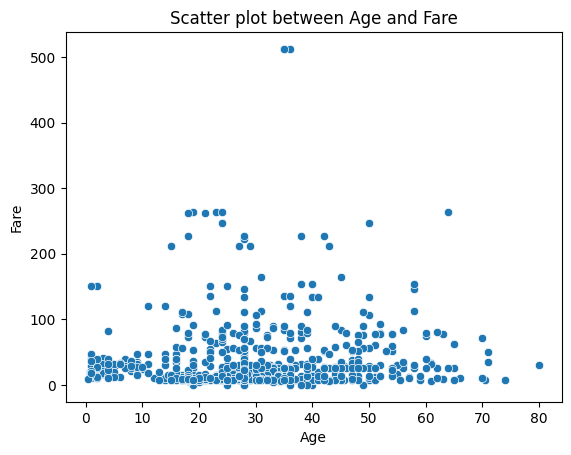

Correlation between Age and Fare: 0.09668842218036486


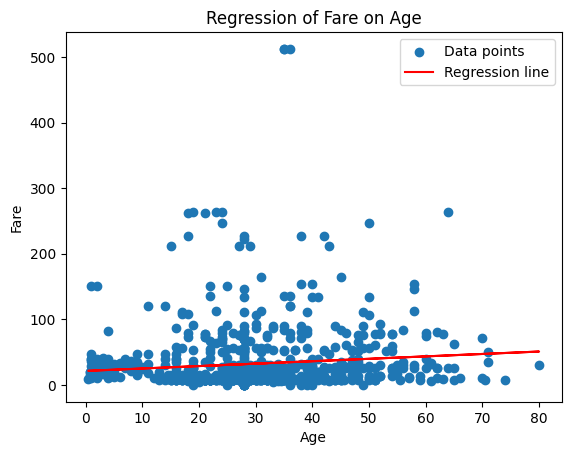

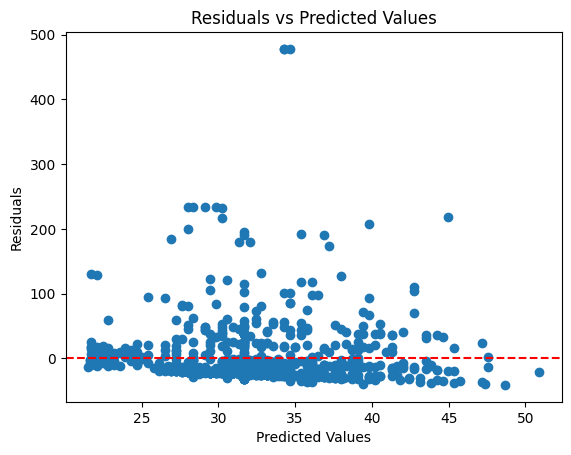

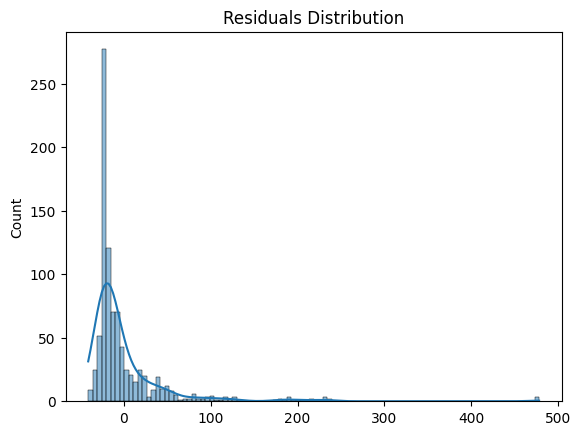

Missing values in Penguins dataset:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


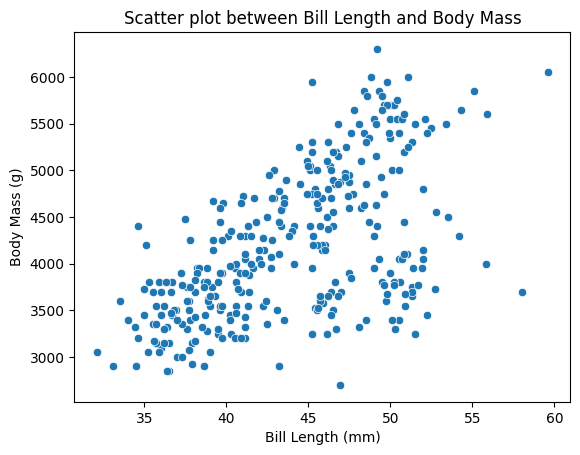

Correlation between Bill Length and Body Mass: 0.589451110176949


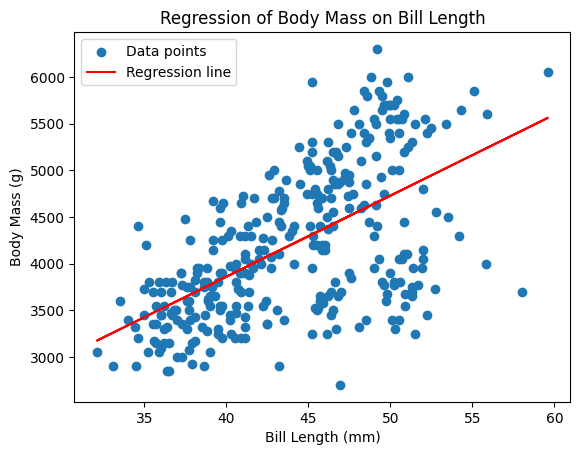

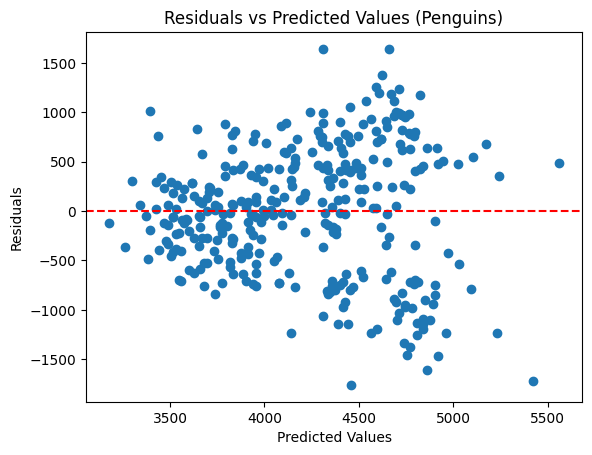

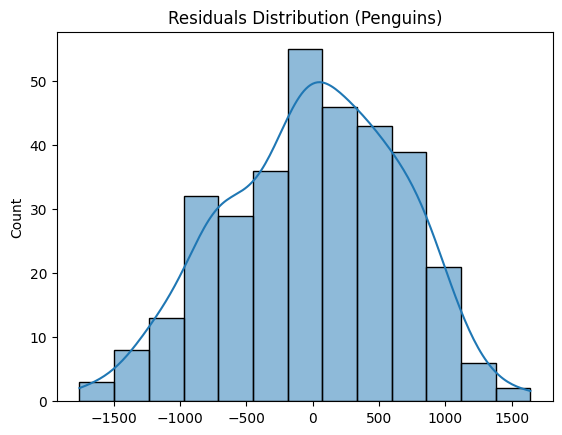

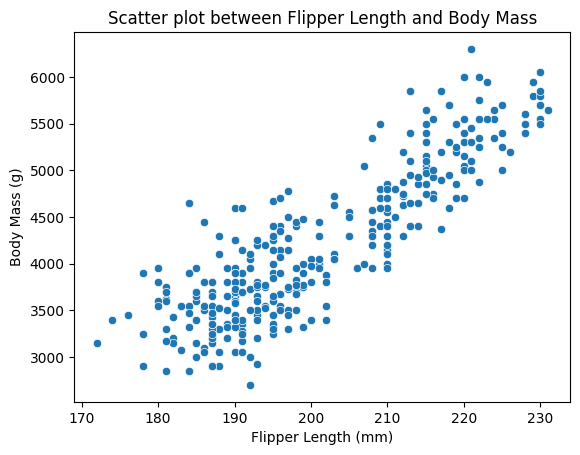

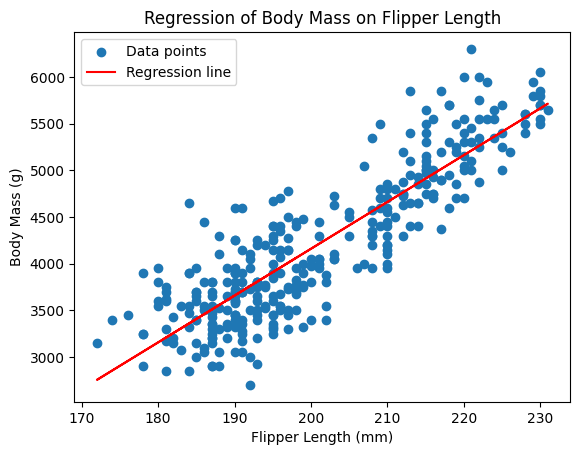

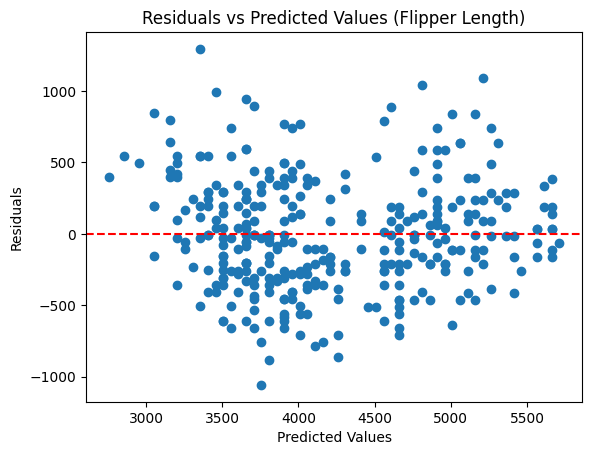

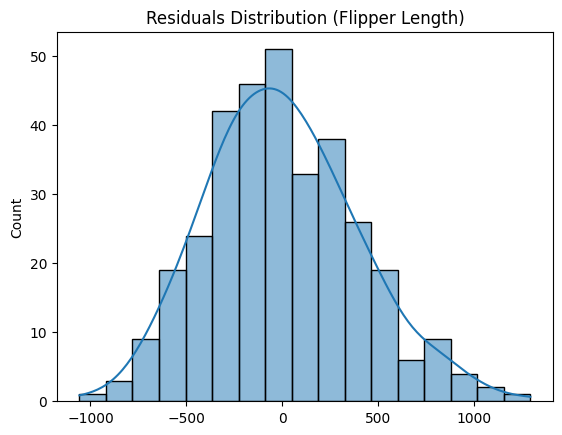

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Step 1: Load the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Step 2: Handle missing values
print("Missing values in Titanic dataset:")
print(titanic_df.isnull().sum())

# Fill missing 'Age' with the median and drop 'Fare' missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.dropna(subset=['Fare'], inplace=True)

# Step 3: Check for linearity between 'Age' and 'Fare'
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.title('Scatter plot between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Calculate correlation
correlation = titanic_df['Age'].corr(titanic_df['Fare'])
print(f'Correlation between Age and Fare: {correlation}')

# Step 3.1: Perform Regression
X = titanic_df['Age']
y = titanic_df['Fare']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot regression line
plt.scatter(titanic_df['Age'], titanic_df['Fare'], label='Data points')
plt.plot(titanic_df['Age'], predictions, color='red', label='Regression line')
plt.title('Regression of Fare on Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

# Step 3.3: Plot the residuals
residuals = y - predictions

# Scatter plot of residuals
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Check for normality of residuals
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Step 4: Load the Penguins dataset
penguins_df = pd.read_csv('penguins.csv')

# Step 5: Handle missing values
print("Missing values in Penguins dataset:")
print(penguins_df.isnull().sum())

# Drop rows with missing values
penguins_df.dropna(inplace=True)

# Step 6: Check for linearity between 'bill_length_mm' and 'body_mass_g'
sns.scatterplot(x='bill_length_mm', y='body_mass_g', data=penguins_df)
plt.title('Scatter plot between Bill Length and Body Mass')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

# Calculate correlation
correlation_penguins = penguins_df['bill_length_mm'].corr(penguins_df['body_mass_g'])
print(f'Correlation between Bill Length and Body Mass: {correlation_penguins}')

# Step 6.1: Perform Regression
X_penguins = penguins_df['bill_length_mm']
y_penguins = penguins_df['body_mass_g']
X_penguins = sm.add_constant(X_penguins)  # Adds a constant term to the predictor

model_penguins = sm.OLS(y_penguins, X_penguins).fit()
predictions_penguins = model_penguins.predict(X_penguins)

# Plot regression line
plt.scatter(penguins_df['bill_length_mm'], penguins_df['body_mass_g'], label='Data points')
plt.plot(penguins_df['bill_length_mm'], predictions_penguins, color='red', label='Regression line')
plt.title('Regression of Body Mass on Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()

# Step 6.2: Plot the residuals
residuals_penguins = y_penguins - predictions_penguins

# Scatter plot of residuals
plt.scatter(predictions_penguins, residuals_penguins)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Penguins)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Check for normality of residuals
sns.histplot(residuals_penguins, kde=True)
plt.title('Residuals Distribution (Penguins)')
plt.show()

# Step 7: Try out different variables from the Penguins dataset
# Example: Regression of 'flipper_length_mm' on 'body_mass_g'
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins_df)
plt.title('Scatter plot between Flipper Length and Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

X_flipper = penguins_df['flipper_length_mm']
y_flipper = penguins_df['body_mass_g']
X_flipper = sm.add_constant(X_flipper)

model_flipper = sm.OLS(y_flipper, X_flipper).fit()
predictions_flipper = model_flipper.predict(X_flipper)

# Plot regression line
plt.scatter(penguins_df['flipper_length_mm'], penguins_df['body_mass_g'], label='Data points')
plt.plot(penguins_df['flipper_length_mm'], predictions_flipper, color='red', label='Regression line')
plt.title('Regression of Body Mass on Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()

# Plot the residuals for flipper length regression
residuals_flipper = y_flipper - predictions_flipper

plt.scatter(predictions_flipper, residuals_flipper)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Flipper Length)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

sns.histplot(residuals_flipper, kde=True)
plt.title('Residuals Distribution (Flipper Length)')
plt.show()


AIM 2: Performing t-Test

1. Load the diabetic_data dataset
2. Handle missing values, if any
3. For the variable 'num_med_proc', check if the data is normally distributed in each of the gender category
4. Calculate the total data points in each gender group
    4.1. If n < 30 and data is normal, perform t-Test.
    4.2. If n > 30 and data is not normal, perform Mann-Whitney U Test
        4.2.1. Try performing the regular t-test even if n > 30 and data is not normal. Do you see any difference in the result?
5. If the data is small and normally distributed, perform ANOVA on the above data. But if the data is large but not normally distributed, perform Kurskal-Wallis. 
    5.1. In either of the above cases, do you get similar result compared to Step 4?
6. Use the appropriate plot to visualize your data 

Missing values in diabetic_data dataset:
patient_nbr         0
race                0
gender              0
age                 0
weight              0
time_in_hospital    0
num_med_proc        0
number_diagnoses    0
insulin             0
dtype: int64


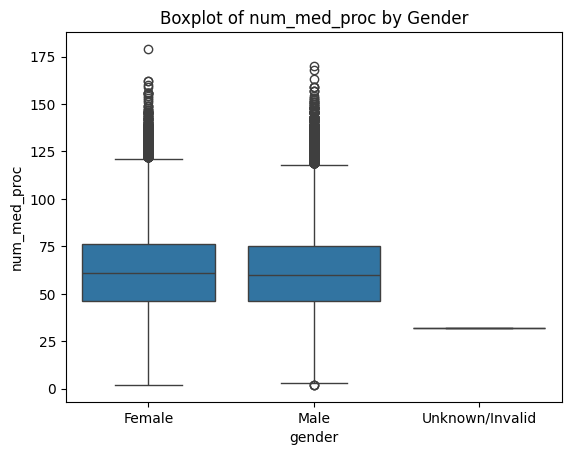

c:\Users\GYM\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test for Female: Statistics=0.994681715965271, p-value=2.781589502851555e-38
Shapiro-Wilk test for Male: Statistics=0.993956446647644, p-value=2.9073100774350776e-38
Not enough data for Shapiro-Wilk test for Unknown/Invalid (n=1)
Total data points in each gender group:
gender
Female             53575
Male               45917
Unknown/Invalid        1
Name: count, dtype: int64
Mann-Whitney U Test results: U-statistic=1211073937.0, p-value=2.7718524844703462e-05
Kruskal-Wallis Test results: H-statistic=17.568199349195314, p-value=2.7718511314853486e-05


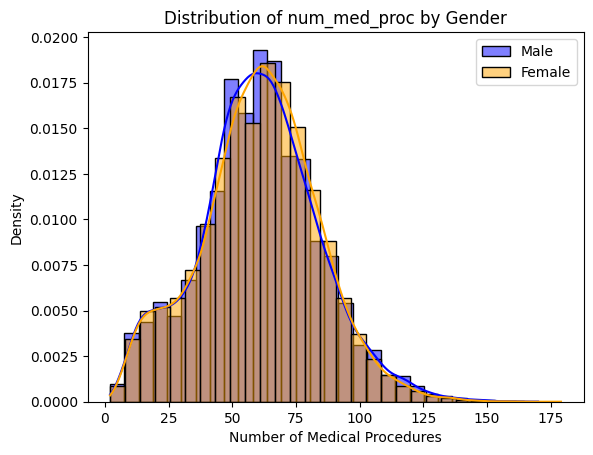

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest

# Step 1: Load the diabetic_data dataset
diabetic_data = pd.read_csv('diabetic_data.csv')

# Step 2: Handle missing values
print("Missing values in diabetic_data dataset:")
print(diabetic_data.isnull().sum())
diabetic_data.dropna(inplace=True)  # Drop rows with missing values

# Step 3: Check normality of 'num_med_proc' by gender
sns.boxplot(x='gender', y='num_med_proc', data=diabetic_data)
plt.title('Boxplot of num_med_proc by Gender')
plt.show()

# Normality test for each gender
for gender in diabetic_data['gender'].unique():
    data = diabetic_data[diabetic_data['gender'] == gender]['num_med_proc']
    if len(data) >= 3:  # Check if there are at least 3 data points
        stat, p = stats.shapiro(data)
        print(f'Shapiro-Wilk test for {gender}: Statistics={stat}, p-value={p}')
    else:
        print(f'Not enough data for Shapiro-Wilk test for {gender} (n={len(data)})')

# Step 4: Total data points in each gender group
gender_counts = diabetic_data['gender'].value_counts()
print("Total data points in each gender group:")
print(gender_counts)

# Step 4.1 and 4.2: Perform t-Test or Mann-Whitney U Test
male_data = diabetic_data[diabetic_data['gender'] == 'Male']['num_med_proc']
female_data = diabetic_data[diabetic_data['gender'] == 'Female']['num_med_proc']

if len(male_data) < 30 and stats.shapiro(male_data)[1] > 0.05:
    t_stat, t_p_value = stats.ttest_ind(male_data, female_data)
    print(f't-Test results: t-statistic={t_stat}, p-value={t_p_value}')
else:
    mw_stat, mw_p_value = stats.mannwhitneyu(male_data, female_data)
    print(f'Mann-Whitney U Test results: U-statistic={mw_stat}, p-value={mw_p_value}')

# Step 5: Perform ANOVA or Kruskal-Wallis Test
if len(male_data) < 30 and stats.shapiro(male_data)[1] > 0.05:
    anova_stat, anova_p_value = stats.f_oneway(male_data, female_data)
    print(f'ANOVA results: F-statistic={anova_stat}, p-value={anova_p_value}')
else:
    kruskal_stat, kruskal_p_value = stats.kruskal(male_data, female_data)
    print(f'Kruskal-Wallis Test results: H-statistic={kruskal_stat}, p-value={kruskal_p_value}')

# Step 6: Visualize the data
sns.histplot(male_data, color='blue', label='Male', kde=True, stat="density", bins=30)
sns.histplot(female_data, color='orange', label='Female', kde=True, stat="density", bins=30)
plt.title('Distribution of num_med_proc by Gender')
plt.xlabel('Number of Medical Procedures')
plt.ylabel('Density')
plt.legend()
plt.show()



AIM 3: Perform Chi-square test

1. Use the same diabetic_data
2. Try to find which two variables can be used for the Chi-Square, and then perform the said test
    2.1. After doing the test, calculate the 'expected frequency'
    2.2. Count the total number of 'expected frequency'
    2.3. Count the number of 'expected frequency' where the value is less than 5
    2.3. Get the percentage of 'expected frequency' taht is less than 5 comapred to the total number of 'expected frequency'
    2.4. If it is more than 20%, then try the test on different sets of categorical variables
3. Interpret the results of the test.


In [7]:
import pandas as pd
from scipy import stats

# Step 1: Load the diabetic_data dataset
diabetic_data = pd.read_csv('diabetic_data.csv')

# Step 1.1: Print the column names
print("Columns in the dataset:", diabetic_data.columns)

# Step 2: Identify categorical variables
# Check if 'race' and 'readmission_status' exist in the DataFrame
if 'race' in diabetic_data.columns:
    print("Unique values for 'race':", diabetic_data['race'].unique())
else:
    print("'race' column not found in the dataset.")

if 'readmission_status' in diabetic_data.columns:
    print("Unique values for 'readmission_status':", diabetic_data['readmission_status'].unique())
else:
    print("'readmission_status' column not found in the dataset.")

# Step 3: Create a contingency table if both columns exist
if 'race' in diabetic_data.columns and 'readmission_status' in diabetic_data.columns:
    contingency_table = pd.crosstab(diabetic_data['race'], diabetic_data['readmission_status'])
    print("Contingency Table:")
    print(contingency_table)

    # Step 4: Perform Chi-square test
    chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)
    print(f"Chi-square Statistic: {chi2_stat:.2f}, p-value: {p_value:.4f}, Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected_freq)

    # Step 4.1: Calculate the expected frequency
    expected_freq_df = pd.DataFrame(expected_freq, index=contingency_table.index, columns=contingency_table.columns)

    # Step 4.2: Count the total number of expected frequencies
    total_expected = expected_freq.sum()
    print(f"Total Expected Frequency: {total_expected:.2f}")

    # Step 4.3: Count the number of expected frequencies less than 5
    expected_less_than_5 = (expected_freq < 5).sum()
    print(f"Number of Expected Frequencies < 5: {expected_less_than_5}")

    # Step 4.4: Calculate the percentage of expected frequencies that are less than 5
    percentage_less_than_5 = (expected_less_than_5 / expected_freq.size) * 100
    print(f"Percentage of Expected Frequencies < 5: {percentage_less_than_5:.2f}%")

    # Step 4.5: Check if percentage is more than 20%
    if percentage_less_than_5 > 20:
        print("More than 20% of expected frequencies are less than 5. Consider testing different sets of categorical variables.")
        # Try a different combination, e.g., 'gender' and the correct readmission column
        if 'gender' in diabetic_data.columns:
            contingency_table2 = pd.crosstab(diabetic_data['gender'], diabetic_data['readmission_status'])
            chi2_stat2, p_value2, dof2, expected_freq2 = stats.chi2_contingency(contingency_table2)
            print("New Contingency Table for 'gender' and 'readmission_status':")
            print(contingency_table2)
            print(f"Chi-square Statistic: {chi2_stat2:.2f}, p-value: {p_value2:.4f}, Degrees of Freedom: {dof2}")
        else:
            print("'gender' column not found in the dataset.")
    else:
        print("Percentage of expected frequencies below 5 is acceptable.")

    # Step 5: Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant association between race and readmission.")
    else:
        print("Fail to reject the null hypothesis: There is no significant association between race and readmission.")
else:
    print("Cannot create contingency table due to missing columns.")



Columns in the dataset: Index(['patient_nbr', 'race', 'gender', 'age', 'weight', 'time_in_hospital',
       'num_med_proc', 'number_diagnoses', 'insulin'],
      dtype='object')
Unique values for 'race': ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
'readmission_status' column not found in the dataset.
Cannot create contingency table due to missing columns.
